<a href="https://colab.research.google.com/github/jsmnithya/Guvi/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv') 

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.shape

(400, 5)

In [ ]:
df.drop_duplicates()
df.shape

(400, 5)

In [ ]:
df=df.drop(['User ID'], axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [ ]:
#Outlier detection
for col in df.columns:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  print("column name:", col)
  print('       upper threshold value:', upper_threshold)
  print('       lower threshold value:', lower_threshold)
  flag=0
  for i in range(1,8):
    if ((df[col].describe()[i]>=lower_threshold) and (df[col].describe()[i]<=upper_threshold)):
      pass
    else:
      flag=1
      break
  if i==1:
    print(col, '=> Outlier Detected')
  else:
    print(col, '=> Outlier Not Detected')

column name: Gender
       upper threshold value: 2.5
       lower threshold value: -1.5
Gender => Outlier Not Detected
column name: Age
       upper threshold value: 70.375
       lower threshold value: 5.375
Age => Outlier Not Detected
column name: EstimatedSalary
       upper threshold value: 155500.0
       lower threshold value: -24500.0
EstimatedSalary => Outlier Not Detected
column name: Purchased
       upper threshold value: 2.5
       lower threshold value: -1.5
Purchased => Outlier Not Detected


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

**Fitting SVM to the Training set**

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

**Predicting the Test set results**

In [ ]:
y_pred=svc_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", svc_model.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))

The confusion matrix: 
 [[65  7]
 [14 34]]
Accuracy :  0.825
f1 score :  0.7640449438202247
AUROC score :  0.8055555555555556


**Visualising the Training set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


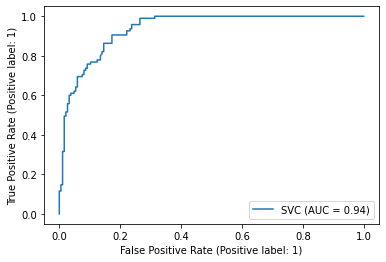

In [ ]:
plot_roc_curve(svc_model, X_train, y_train)

**Visualising the Test set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


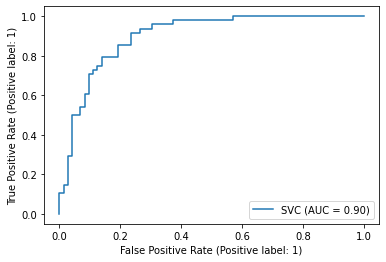

In [ ]:
plot_roc_curve(svc_model, X_test, y_test)